# Chapter 2 - Data Science Fundamentals for Python and MongoDB


# 1) Stock Simulations

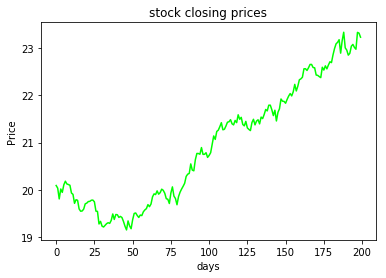

In [31]:
import matplotlib.pyplot as plt, numpy as np
from scipy import stats

def cum_price(p, d, m, s):
    data = []
    for d in range(d):
            prob = stats.norm.rvs(loc=m, scale=s)
            price = (p * prob)
            data.append(price)
            p = price
    return data

if __name__ == "__main__":
    stk_price, days, mean, s = 20, 200, 1.001, 0.005
    data = cum_price(stk_price, days, mean, s)
    plt.plot(data, color='lime')
    plt.ylabel('Price')
    plt.xlabel('days')
    plt.title('stock closing prices')
    plt.show()


# 2) What-if Analysis

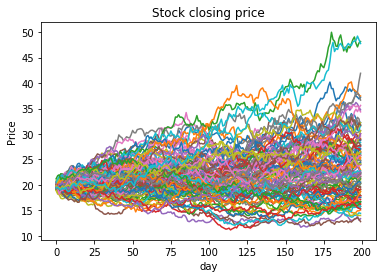

In [32]:
import matplotlib.pyplot as plt, numpy as np
from scipy import stats

def cum_price(p, d, m, s):
    data = []
    for d in range(d):
            prob = stats.norm.rvs(loc=m, scale=s)
            price = (p * prob)
            data.append(price)
            p = price
    return data

if __name__ == "__main__":
    stk_price, days, mu, sigma = 20, 200, 1.001, 0.02
    x = 0
    while x < 100:
        data = cum_price(stk_price, days, mu, sigma)
        plt.plot(data)
        x += 1
    plt.ylabel('Price')
    plt.xlabel('day')
    plt.title('Stock closing price')
    plt.show()


# 3) Product Demand Simulation

Profit for 10,000 units: $25,000.00
Profit for 20,000 units: $45,627.80
Profit for 40,000 units: $58,197.40
Profit for 60,000 units: $45,781.20


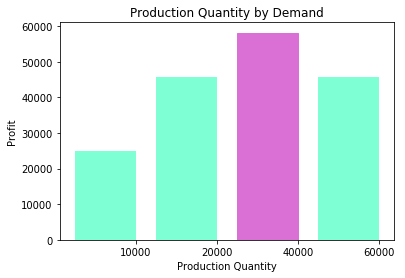

In [33]:
import matplotlib.pyplot as plt, numpy as np

def demand():
    p = np.random.uniform(0,1)
    if p < 0.10:
        return 10000
    elif p >= 0.10 and p < 0.45:
        return 20000
    elif p >= 0.45 and p < 0.75:
        return 40000
    else:
        return 60000

def production(demand, units, price, unit_cost, disposal):
    units_sold = min(units, demand)
    revenue = units_sold * price
    total_cost = units * unit_cost
    units_not_sold = units - units_sold
    if units_not_sold > 0:
        disposal_cost = disposal * units_not_sold
    else:
        disposal_cost = 0
    profit = revenue - total_cost - disposal_cost
    return profit

def mcs(x, n, units, price, unit_cost, disposal):
    profit = []
    while x <= n:
        d = demand()
        v = production(d, units, price, unit_cost, disposal)
        profit.append(v)
        x += 1
    return profit
    
def max_bar(ls):
    tup = max(enumerate(ls))
    return tup[0] - 1

if __name__ == "__main__":
    units = [10000, 20000, 40000, 60000]
    price, unit_cost, disposal = 4, 1.5, 0.2
    avg_p = []
    x, n = 1, 10000
    profit_10 = mcs(x, n, units[0], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_10))
    print ('Profit for {:,.0f}'.format(units[0]),
          'units: ${:,.2f}'.format(np.mean(profit_10)))
    profit_20 = mcs(x, n, units[1], price, unit_cost, disposal)
    avg_p.append(np.mean(np.mean(profit_20)))
    print ('Profit for {:,.0f}'.format(units[1]),
          'units: ${:,.2f}'.format(np.mean(profit_20)))
    profit_40 = mcs(x, n, units[2], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_40))
    print ('Profit for {:,.0f}'.format(units[2]),
          'units: ${:,.2f}'.format(np.mean(profit_40)))
    profit_60 = mcs(x, n, units[3], price, unit_cost, disposal)
    avg_p.append(np.mean(profit_60))
    print ('Profit for {:,.0f}'.format(units[3]),
          'units: ${:,.2f}'.format(np.mean(profit_60)))
    labels = ['10000','20000','40000','60000']
    pos = np.arange(len(labels))
    width = 0.75 # set less than 1.0 for spaces between bins
    plt.figure(2)
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(labels)
    barlist = plt.bar(pos, avg_p, width, color='aquamarine')
    barlist[max_bar(avg_p)].set_color('orchid')
    plt.ylabel('Profit')
    plt.xlabel('Production Quantity')
    plt.title('Production Quantity by Demand')
    plt.show()


# 4) Monte Carlo

In [27]:
import matplotlib.pyplot as plt, numpy as np

def demand():
    p = np.random.uniform(0,1)
    if p < 0.10:
        return 10000
    elif p >= 0.10 and p < 0.45:
        return 20000
    elif p >= 0.45 and p < 0.75:
        return 40000
    else:
        return 60000

def production(demand, units, price, unit_cost, disposal):
    units_sold = min(units, demand)
    revenue = units_sold * price
    total_cost = units * unit_cost
    units_not_sold = units - demand
    if units_not_sold > 0:
        disposal_cost = disposal * units_not_sold
    else:
        disposal_cost = 0
    profit = revenue - total_cost - disposal_cost
    return profit

def mcs(x, n, units, price, unit_cost, disposal):
    profit = []
    while x <= n:
        d = demand()
        v = production(d, units, price, unit_cost, disposal)
        profit.append(v)
        x += 1
    return profit

def display(p,u):
    print ('Profit for {:,.0f}'.format(units[u]),
           'units: ${:,.2f}'.format(np.mean(p)))
    
if __name__ == "__main__":
    units = [10000, 20000, 40000, 60000]
    price, unit_cost, disposal = 4, 1.5, 0.2
    avg_ls = []
    x, n, y, z = 1, 10000, 1, 10
    while y <= z:
        profit_10 = mcs(x, n, units[0], price, unit_cost, disposal)
        profit_20 = mcs(x, n, units[1], price, unit_cost, disposal)
        avg_profit = np.mean(profit_20)
        profit_40 = mcs(x, n, units[2], price, unit_cost, disposal)
        avg_profit = np.mean(profit_40)
        profit_60 = mcs(x, n, units[3], price, unit_cost, disposal)
        avg_profit = np.mean(profit_60)
        avg_ls.append({'p10':np.mean(profit_10),
                       'p20':np.mean(profit_20),
                       'p40':np.mean(profit_40),
                       'p60':np.mean(profit_60)})
        y += 1
    mcs_p10, mcs_p20, mcs_p40, mcs_p60 = [], [], [], []
    for row in avg_ls:
        mcs_p10.append(row['p10'])
        mcs_p20.append(row['p20'])
        mcs_p40.append(row['p40'])
        mcs_p60.append(row['p60'])
    display(np.mean(mcs_p10),0)
    display(np.mean(mcs_p20),1)
    display(np.mean(mcs_p40),2)
    display(np.mean(mcs_p60),3)


Profit for 10,000 units: $25,000.00
Profit for 20,000 units: $45,786.98
Profit for 40,000 units: $57,842.50
Profit for 60,000 units: $44,841.66


# 5) Read and Write

In [14]:
import csv

def read_txt(f):
    with open(f, 'r') as f:
        d = f.readlines()
        return [x.strip() for x in d]

def conv_csv(t, c):
    data = read_txt(t)
    with open(c, 'w', newline='') as csv_file:
        writer = csv.writer(csv_file)
        for line in data:
            ls = line.split()
            writer.writerow(ls)

def read_csv(f):
    contents = ''
    with open(f, 'r') as f:
        reader = csv.reader(f)
        return list(reader)

def read_dict(f, h):
    input_file = csv.DictReader(open(f), fieldnames=h)
    return input_file

def od_to_d(od):
    return dict(od)

if __name__ == "__main__":
    f = 'data/names.txt'
    data = read_txt(f)
    print ('text file data sample:')
    for i, row in enumerate(data):
        if i < 3:
            print (row)
    csv_f = 'data/names.csv'
    conv_csv(f, csv_f)
    r_csv = read_csv(csv_f)
    print ('\ntext to csv sample:')
    for i, row in enumerate(r_csv):
        if i < 3:
            print (row)
    headers = ['first', 'last']
    r_dict = read_dict(csv_f, headers)
    dict_ls = []
    print ('\ncsv to ordered dict sample:')
    for i, row in enumerate(r_dict):
        r = od_to_d(row)
        dict_ls.append(r)
        if i < 3:
            print (row)
    print ('\nlist of dictionary elements sample:')
    for i, row in enumerate(dict_ls):
        if i < 3:
            print (row)


text file data sample:
Adam Baum
Adam Zapel
Al Bino

text to csv sample:
['Adam', 'Baum']
['Adam', 'Zapel']
['Al', 'Bino']

csv to ordered dict sample:
OrderedDict([('first', 'Adam'), ('last', 'Baum')])
OrderedDict([('first', 'Adam'), ('last', 'Zapel')])
OrderedDict([('first', 'Al'), ('last', 'Bino')])

list of dictionary elements sample:
{'first': 'Adam', 'last': 'Baum'}
{'first': 'Adam', 'last': 'Zapel'}
{'first': 'Al', 'last': 'Bino'}


# 6) List Comprehension

In [16]:
if __name__ == "__main__":
    miles = [100, 10, 9.5, 1000, 30]
    kilometers = [x * 1.60934 for x in miles]
    print ('miles to kilometers:')
    for i, row in enumerate(kilometers):
        print ('{:>4} {:>8}{:>8} {:>2}'.
               format(miles[i],'miles is', round(row,2), 'km'))
    print ('\npet:')
    pet = ['cat', 'dog', 'rabbit', 'parrot', 'guinea pig', 'fish']
    print (pet)
    print ('\npets:')
    pets = [x + 's' if x != 'fish' else x for x in pet]
    print (pets)
    subset = [x for x in pets if x != 'fish' and x != 'rabbits'
              and x != 'parrots' and x != 'guinea pigs']
    print ('\nmost common pets:')
    print (subset[1], 'and', subset[0])
    sales = [9000, 20000, 50000, 100000]
    print ('\nbonuses:')
    bonus = [0 if x < 10000 else x * .02 if x >= 10000 and x <= 20000
             else x * .03 for x in sales]
    print (bonus)
    print ('\nbonus dict:')
    people = ['dave', 'sue', 'al', 'sukki']
    d = {}
    for i, row in enumerate(people):
        d[row] = bonus[i]
    print (d, '\n')
    print ('{:<5} {:<5}'.format('emp', 'bonus'))
    for k, y in d.items():
        print ('{:<5} {:>6}'.format(k, y))


miles to kilometers:
 100 miles is  160.93 km
  10 miles is   16.09 km
 9.5 miles is   15.29 km
1000 miles is 1609.34 km
  30 miles is   48.28 km

pet:
['cat', 'dog', 'rabbit', 'parrot', 'guinea pig', 'fish']

pets:
['cats', 'dogs', 'rabbits', 'parrots', 'guinea pigs', 'fish']

most common pets:
dogs and cats

bonuses:
[0, 400.0, 1500.0, 3000.0]

bonus dict:
{'dave': 0, 'sue': 400.0, 'al': 1500.0, 'sukki': 3000.0} 

emp   bonus
dave       0
sue    400.0
al    1500.0
sukki 3000.0


# 7) Generators

In [19]:
import csv, time, numpy as np

def read_dict(f, h):
    input_file = csv.DictReader(open(f), fieldnames=h)
    return (input_file)

def conv_reg_dict(d):
    return [dict(x) for x in d]

def sim_times(d, n):
    i = 0
    lsd, lsgc = [], []
    while i < n:
        start = time.clock()
        [x for x in d]
        time_d = time.clock() - start
        lsd.append(time_d)
        start = time.clock()
        (x for x in d)
        time_gc = time.clock() - start
        lsgc.append(time_gc)
        i += 1
    return (lsd, lsgc)

def gen(d):
    yield (x for x in d)

def sim_gen(d, n):
    i = 0
    lsg = []
    generator = gen(d)
    while i < n:
        start = time.clock()
        for row in generator:
            None
        time_g = time.clock() - start
        lsg.append(time_g)
        i += 1
        generator = gen(d)        
    return lsg

def avg_ls(ls):
    return np.mean(ls)

if __name__ == '__main__':
    f = 'data/names.csv'
    headers = ['first', 'last']
    r_dict = read_dict(f, headers)
    dict_ls = conv_reg_dict(r_dict)
    n = 1000
    ls_times, gc_times = sim_times(dict_ls, n)
    g_times = sim_gen(dict_ls, n)
    avg_ls = np.mean(ls_times)
    avg_gc = np.mean(gc_times)
    avg_g = np.mean(g_times)
    gc_ls = round((avg_ls / avg_gc), 2)
    g_ls = round((avg_ls / avg_g), 2)
    print ('generator comprehension:')
    print (gc_ls, 'times faster than list comprehension\n')
    print ('generator:')
    print (g_ls, 'times faster than list comprehension')


generator comprehension:
3.85 times faster than list comprehension

generator:
3.77 times faster than list comprehension


C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()
C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
C:\Users\Student\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: De

# 8) Random

In [2]:
import csv, random, time

def read_dict(f, h):
    input_file = csv.DictReader(open(f), fieldnames=h)
    return (input_file)

def conv_reg_dict(d):
    return [dict(x) for x in d]

def r_inds(ls, n):
    length = len(ls) - 1
    yield [random.randrange(length) for _ in range(n)]

def get_slice(ls, n):
    return ls[:n]

def p_line():
    print ()

if __name__ == '__main__':
    f = 'data/names.csv'
    headers = ['first', 'last']
    r_dict = read_dict(f, headers)
    dict_ls = conv_reg_dict(r_dict)
    n = len(dict_ls)
    r = random.randrange(0, n-1)
    print ('randomly selected index:', r)
    print ('randomly selected element:', dict_ls[r])    
    elements = 3
    generator = next(r_inds(dict_ls, elements))
    p_line()
    print (elements, 'randomly generated indicies:', generator)
    print (elements, 'elements based on indicies:')
    for row in generator:
        print (dict_ls[row])
    x = [[i] for i in range(n-1)]
    random.shuffle(x)
    p_line()
    print ('1st', elements, 'shuffled elements:')
    ind = get_slice(x, elements)
    for row in ind:
        print (dict_ls[row[0]])
    seed = 1
    random_seed = random.seed(seed)
    rs1 = random.randrange(0, n-1)
    p_line()
    print ('deterministic seed', str(seed) + ':', rs1)
    print ('corresponding element:', dict_ls[rs1])
    t = time.time()
    random_seed = random.seed(t)
    rs2 = random.randrange(0, n-1)
    p_line()
    print ('non-deterministic time seed', str(t) + ' index:', rs2)
    print ('corresponding element:', dict_ls[rs2], '\n')
    print (elements, 'random elements seeded with time:')
    for i in range(elements):
        r = random.randint(0, n-1)
        print (dict_ls[r], r)
    random_seed = random.seed()
    rs3 = random.randrange(0, n-1)
    p_line()
    print ('non-deterministic auto seed:', rs3)
    print ('corresponding element:', dict_ls[rs3], '\n')
    print (elements, 'random elements auto seed:')
    for i in range(elements):
        r = random.randint(0, n-1)
        print (dict_ls[r], r)
    names = []
    for row in dict_ls:
        name = row['last'] + ', ' + row['first']
        names.append(name)
    p_line()
    print (elements, 'names with "random.choice()":')
    for row in range(elements):
        print (random.choice(names))
    p_line()
    print (elements, 'names with "random.sample()":')
    print (random.sample(names, elements))


randomly selected index: 18
randomly selected element: {'first': 'Anita', 'last': 'Job'}

3 randomly generated indicies: [97, 32, 48]
3 elements based on indicies:
{'first': 'Jean', 'last': 'Poole'}
{'first': 'Anne', 'last': 'Howe'}
{'first': 'Bill', 'last': 'Board'}

1st 3 shuffled elements:
{'first': 'Stan', 'last': 'Still'}
{'first': 'Anna', 'last': 'Conda'}
{'first': 'Helen', 'last': 'Back'}

deterministic seed 1: 34
corresponding element: {'first': 'April', 'last': 'Schauer'}

non-deterministic time seed 1549054164.3792622 index: 116
corresponding element: {'first': 'Mel', 'last': 'Loewe'} 

3 random elements seeded with time:
{'first': 'Anita', 'last': 'Bathe'} 13
{'first': 'May', 'last': 'Day'} 114
{'first': 'Armand', 'last': 'Hammer'} 35

non-deterministic auto seed: 96
corresponding element: {'first': 'Jay', 'last': 'Walker'} 

3 random elements auto seed:
{'first': 'Neil', 'last': 'Down'} 124
{'first': 'Annette', 'last': 'Curtain'} 31
{'first': 'Harry', 'last': 'Legg'} 84

3 

# 9) Mongo and Json

In [5]:
import json, csv, sys, os
sys.path.append(os.getcwd()+'/classes')
import conn

def read_dict(f, h):
    input_file = csv.DictReader(open(f), fieldnames=h)
    return (input_file)

def conv_reg_dict(d):
    return [dict(x) for x in d]

def dump_json(f, d):
    with open(f, 'w') as f:
        json.dump(d, f)

def read_json(f):
    with open(f) as f:
        return json.load(f)

if __name__ == '__main__':
    f = 'data/names.csv'
    headers = ['first', 'last']
    r_dict = read_dict(f, headers)
    dict_ls = conv_reg_dict(r_dict)
    json_file = 'data/names.json'
    dump_json(json_file, dict_ls)
    data = read_json(json_file)
    obj = conn.conn('mcklayne')
    db = obj.getDB()
    names = db.names
    names.drop()
    for i, row in enumerate(data):
        row['_id'] = i
        names.insert_one(row)
    n = 3
    print('1st', n, 'names:')
    people = names.find()
    for i, row in enumerate(people):
        if i < n:
            print (row)
    people.rewind()
    print('\n1st', n, 'names with rewind:')    
    for i, row in enumerate(people):
        if i < n:
            print (row)
    print ('\nquery 1st', n, 'names')
    first_n = names.find().limit(n)
    for row in first_n:
        print (row)
    print ('\nquery last', n, 'names')
    length = names.find().count()
    last_n = names.find().skip(length - n)
    for row in last_n:
        print (row)
    fnames = ['Ella', 'Lou']
    lnames = ['Vader', 'Pole']    
    print ('\nquery Ella:')
    query_1st_in_list = names.find( {'first':{'$in':[fnames[0]]}})
    for row in query_1st_in_list:
        print (row)
    print ('\nquery Ella or Lou:')
    query_1st = names.find( {'first':{'$in':fnames}} )
    for row in query_1st:
        print (row)
    print ('\nquery Lou Pole:')
    query_and = names.find( {'first':fnames[1], 'last':lnames[1]} )
    for row in query_and:
        print (row)
    print ('\nquery first name Ella or last name Pole:')
    query_or = names.find( {'$or':[{'first':fnames[0]}, {'last':lnames[1]}]} )
    for row in query_or:
        print (row)
    pattern = '^Sch'
    print ('\nquery regex pattern:')
    query_like = names.find( {'last':{'$regex':pattern}} )
    for row in query_like:
        print (row)
    pid = names.count()
    doc = {'_id':pid, 'first':'Wendy', 'last':'Day'}
    names.insert_one(doc)
    print ('\ndisplay added document:')
    q_added = names.find({'first':'Wendy'})
    print (q_added.next())
    print ('\nquery last n documents:')
    q_n = names.find().skip((pid-n)+1)
    for _ in range(n):
        print (q_n.next())


1st 3 names:
{'_id': 0, 'first': 'Adam', 'last': 'Baum'}
{'_id': 1, 'first': 'Adam', 'last': 'Zapel'}
{'_id': 2, 'first': 'Al', 'last': 'Bino'}

1st 3 names with rewind:
{'_id': 0, 'first': 'Adam', 'last': 'Baum'}
{'_id': 1, 'first': 'Adam', 'last': 'Zapel'}
{'_id': 2, 'first': 'Al', 'last': 'Bino'}

query 1st 3 names
{'_id': 0, 'first': 'Adam', 'last': 'Baum'}
{'_id': 1, 'first': 'Adam', 'last': 'Zapel'}
{'_id': 2, 'first': 'Al', 'last': 'Bino'}

query last 3 names
{'_id': 163, 'first': 'Will', 'last': 'Power'}
{'_id': 164, 'first': 'Willie', 'last': 'Waite'}
{'_id': 165, 'first': 'Willie', 'last': 'Makeit'}

query Ella:
{'_id': 79, 'first': 'Ella', 'last': 'Vader'}

query Ella or Lou:
{'_id': 79, 'first': 'Ella', 'last': 'Vader'}
{'_id': 108, 'first': 'Lou', 'last': 'Pole'}

query Lou Pole:
{'_id': 108, 'first': 'Lou', 'last': 'Pole'}

query first name Ella or last name Pole:
{'_id': 79, 'first': 'Ella', 'last': 'Vader'}
{'_id': 108, 'first': 'Lou', 'last': 'Pole'}

query regex patte

C:\Users\McKlayne Marshall\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
C:\Users\McKlayne Marshall\Anaconda3\lib\site-packages\ipykernel_launcher.py:78: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere


# 10) Visualization

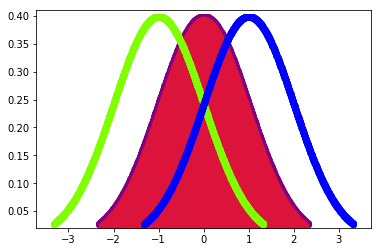

In [10]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

if __name__ == '__main__':
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), num=1000)
    x_left = x - 1
    x_right = x + 1
    y = norm.pdf(x)
    plt.ylim(0.02, 0.41)
    plt.scatter(x, y, color='purple')
    plt.fill_between(x, y, color='crimson')
    plt.scatter(x_left, y, color='chartreuse')
    plt.scatter(x_right, y, color='blue')
    plt.show()
